# InstaBot  2

## 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### (1.1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [12]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
driver=webdriver.Chrome(executable_path='C:/Users/Ayanava/Desktop/chromedriver')
driver.get('https://www.google.com')
data=driver.find_element_by_name('q')
data.send_keys('instagram')
data.submit()
data=driver.find_element_by_class_name('ellip')
data.click()
driver.implicitly_wait(10)
data=driver.find_element_by_xpath('//button[contains(@class," L3NKy")]')
data.click()
driver.implicitly_wait(10)
data=driver.find_element_by_id('m_login_email')
data.send_keys('SAMPLE USERNAME')
data=driver.find_element_by_id('m_login_password')
data.send_keys('SAMPLE PASSWORD')
data=driver.find_element_by_name('login')
data.click()
driver.implicitly_wait(10)
data=driver.find_element_by_xpath('//button[contains(@class,"aOOlW")]')
data.click()
dic={}
c=0
for i in range(20):
    if c>10:
        break
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    data.clear()
    data.send_keys('food')
    driver.implicitly_wait(10)
    data=driver.find_elements_by_xpath('//span[contains(@class,"Ap253")]')
    handle=data[i].text
    if handle[0]!='#':
        data[i].click()
        c=c+1
        data=driver.find_element_by_xpath('//h1[contains(@class,"_7UhW9")]')
        val=data.text
        data=BeautifulSoup(driver.page_source,'html.parser')
        new_data=data.a.span
        final_data=new_data['title']
        final_data=int(final_data.replace(',',''))
        final_data
        dic[val]=final_data
        driver.back()
        driver.implicitly_wait(10)
        data=driver.find_element_by_xpath('//button[contains(@class,"aOOlW")]')
        data.click()
    else:
        data[i].click()
        driver.back()
        driver.implicitly_wait(10)
        data=driver.find_element_by_xpath('//button[contains(@class,"aOOlW")]')
        data.click()
top_5={}
for i in range(5):
    maxy=-999999
    for j in dic:
        if dic[j]>maxy:
            max_name=j
            maxy=dic[j]
    top_5[max_name]=maxy
    dic[max_name]=-99999999999
print('Top 5 followers')
top_5_blog=[]
for i in top_5:
    top_5_blog.append(i)
for i in top_5_blog:
    print(i)

Top 5 followers
foodnetwork
foodgod
foodtalkindia
foodmaniacindia
foodiesince96


### (1.2) Now Find the number of posts these handles have done in the previous 3 days.

In [13]:
no_of_posts={}
for t in top_5_blog:
    count=0
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    data.send_keys(t)
    driver.implicitly_wait(10)
    data=driver.find_element_by_xpath('//span[contains(@class,"Ap253")]')
    data.click()
    driver.implicitly_wait(10)
    for i in range(12):
        driver.execute_script('window.scrollBy(0,2000);')
        time.sleep(1)
    data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')
    for j in range(12):
        driver.execute_script('window.scrollBy(0,-2000);')
        time.sleep(1)
    driver.execute_script('window.scrollBy(0,500);')
    final=data
    driver.implicitly_wait(10)
    for k in range(len(final)):
        data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')
        driver.execute_script('window.scrollBy(0,80);')
        driver.implicitly_wait(10) 
        data[k].click()
        driver.implicitly_wait(10)
        dta=driver.find_element_by_xpath('//time[contains(@class,"FH9sR")]')
        val=dta.text
        if val[-1]=='d':
            new_val=int(val[0:-1])
            if new_val<4:
                count=count+1
            else:
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                break
        else:
            if val[-1]=='h':
                count=count+1
            elif val[-1]=='m':
                count=count+1
            else:
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                break
        new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
        new.click()
    no_of_posts[t]=count
handles=[]
number_posts=[]
for i in no_of_posts:
    handles.append(i)
    number_posts.append(no_of_posts[i])
for i in range(len(handles)):
    print(handles[i],'',number_posts[i])

foodnetwork  33
foodgod  2
foodtalkindia  8
foodmaniacindia  7
foodiesince96  12


### (1.3) Depict this information using a suitable graph.

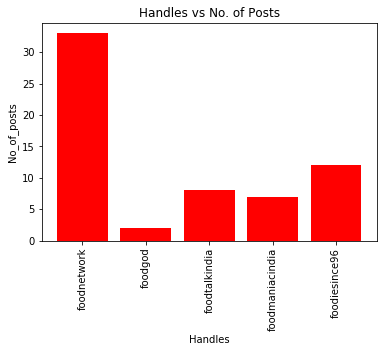

In [16]:
import matplotlib.pyplot as plt
plt.bar(handles,number_posts,color='red')
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('No_of_posts')
plt.title('Handles vs No. of Posts')
plt.show()

## 2.Your friend also needs a list of hashtags that he should use in his posts.

### (2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [17]:
top_5_post_content={}
for t in top_5_blog:
    post_content={}
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    data.send_keys(t)
    driver.implicitly_wait(10)
    data=driver.find_element_by_xpath('//span[contains(@class,"Ap253")]')
    data.click()
    driver.implicitly_wait(10)
    driver.execute_script('window.scrollBy(0,500);')
    for p in range(10):
        data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')
        driver.execute_script('window.scrollBy(0,80);')
        driver.implicitly_wait(10) 
        data[p].click()
        driver.implicitly_wait(10)
        num='post'+str(p+1)
        data=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span')
        value=data.text
        post_content[num]=value
        new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
        new.click()
    
    top_5_post_content[t]=post_content
print(top_5_post_content)

{'foodnetwork': {'post1': 'French toast just got bruleed (and it will never be the same!) 🔥\n. . .\nWatch @bobbyflay on all-new episodes of #WorstCooks > Sundays at 9|8c\n. . .\nFind the recipe for Creme Brulee French Toast at FoodNetwork.com!', 'post2': 'Reasons why we don’t want summer (aka grilling season) to end: these tender, smoky RIBS! Wow, wow, wow, Sasquatch BBQ ❗❗', 'post3': 'We have DREAMS about this ooey, gooey cookie dough cup 😍 This is on another level, @madebyablonde!', 'post4': 'This chocolate-covered gelato dome is inspired by the Baci truffle 💕 We could watch the moment at :45 on REPEAT... 👏, @qualityitalian! #FoodNetworkFinds', 'post5': "Chicken Pot Pie... in a MUG?! Don't knock it 'til you try it!\n. . .\nWatch @jeffmauro on #TheKitchen, tomorrow at 11a|10c!\n. . .\nFind the recipe at FoodNetwork.com!", 'post6': 'We Tried Foods from New England 🦀\n\nNew 👏 England 👏 Clam 👏 Chowder 👏 Need we say more?! On this week’s #TasteTest, we’re trying regional foods from New En

### (2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [18]:
total_words_with_freq={}
for i in top_5_post_content:
    val=top_5_post_content[i]
    for j in range(10):
        post_number='post'+str(j+1)
        new_val=val[post_number]
        final_val=new_val.split()
        for k in final_val:
            if k[0]=='#':
                ans=k[1:]
                if ans in total_words_with_freq:
                    total_words_with_freq[ans]+=1
                else:
                    total_words_with_freq[ans]=1
print(total_words_with_freq)

{'WorstCooks': 1, 'FoodNetworkFinds': 1, 'TheKitchen,': 1, 'TasteTest,': 1, 'DDD': 2, 'a': 1, 'DiscoverDelhi': 1, 'OfferAlert': 1, 'FarziCafe': 1, 'ManyGuppyReturns': 1, 'GuppyGang': 1, 'NewInTown': 1, 'theheritagefood': 1, 'orientheritage': 1, 'PoojaDhingra': 1, 'TalkChef': 1, 'TalkHiddenGems': 1, 'GungThePalace': 1, 'foodmaniacindia': 10, 'udaipur': 1, 'udaipurtimes': 1, 'udaipurblog': 1, 'udaipurdiaries': 1, 'rajasthan': 1, 'rajasthani': 1, 'rajasthanifood': 1, 'rajasthantourism': 1, 'indianfood': 9, 'indiagram': 8, 'indiatravel': 2, 'indiapictures': 2, 'incredibleindia': 2, 'indiatravelgram': 1, 'foodiesofinstagram': 1, 'storiesofindia': 3, 'fries': 1, 'friyay': 1, 'friyayvibes': 1, 'friday': 1, 'foodporn': 8, 'huffposttaste': 8, 'buzzfeast': 8, 'buzzfeedtasty': 7, 'forkyeah': 5, 'f52grams': 3, 'delhifood': 5, 'delhifoodie': 5, 'delhite': 5, 'delhincr': 4, 'delhiblogger': 5, 'delhidiaries': 5, 'delhigram': 5, 'delhi_igers': 4, 'delhilove': 1, 'dilli': 5, 'indiaclicks': 2, 'sandwich

### (2.3) Create a csv file with two columns : the word and its frequency

In [19]:
import numpy as np
import pandas as pd
li_2d=[]
for i in total_words_with_freq:
    small=[]
    small.append(i)
    small.append(total_words_with_freq[i])
    li_2d.append(small)
final_data=np.array(li_2d)
dataset=pd.DataFrame({'Word':final_data[:,0],'Frequency':final_data[:,1]})
dataset.to_csv('New_Word_Frequency.csv',index=False)
print(dataset)

                   Word Frequency
0            WorstCooks         1
1      FoodNetworkFinds         1
2           TheKitchen,         1
3            TasteTest,         1
4                   DDD         2
5                     a         1
6         DiscoverDelhi         1
7            OfferAlert         1
8             FarziCafe         1
9      ManyGuppyReturns         1
10            GuppyGang         1
11            NewInTown         1
12      theheritagefood         1
13       orientheritage         1
14         PoojaDhingra         1
15             TalkChef         1
16       TalkHiddenGems         1
17        GungThePalace         1
18      foodmaniacindia        10
19              udaipur         1
20         udaipurtimes         1
21          udaipurblog         1
22       udaipurdiaries         1
23            rajasthan         1
24           rajasthani         1
25       rajasthanifood         1
26     rajasthantourism         1
27           indianfood         9
28            

### (2.4) Now, find the hashtags that were most popular among these bloggers

In [20]:
new_total_words_with_freq=sorted(total_words_with_freq,key=total_words_with_freq.get,reverse=True)
print('Top 5 Hashtags')
print()
top_5_hash=[]
top_5_times=[]
for i in range(5):
    top_5_hash.append(new_total_words_with_freq[i])
    top_5_times.append(total_words_with_freq[new_total_words_with_freq[i]])
for j in range(5):
    print(top_5_hash[j],'',top_5_times[j])

Top 5 Hashtags

foodmaniacindia  10
Foodiesince96  10
indianfood  9
indiagram  8
foodporn  8


### (2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

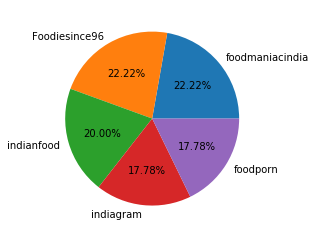

In [21]:
import matplotlib.pyplot as plt
plt.pie(top_5_times,labels=top_5_hash,autopct="%.2f%%")
plt.show()

## 3.You need to also calculate average followers : likes ratio for the obtained handles. 
## Followers : Likes ratio is calculated as follows:

### (3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [22]:
from selenium.common.exceptions import NoSuchElementException
top_5_post_likes={}
for t in top_5_blog:
    post_likes={}
    count=0
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    data.send_keys(t)
    driver.implicitly_wait(10)
    data=driver.find_element_by_xpath('//span[contains(@class,"Ap253")]')
    data.click()
    driver.implicitly_wait(10)
    for i in range(12):
        driver.execute_script('window.scrollBy(0,2000);')
        time.sleep(1)
    data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')
    for j in range(12):
        driver.execute_script('window.scrollBy(0,-2000);')
        time.sleep(1)
    driver.execute_script('window.scrollBy(0,500);')
    final=data
    driver.implicitly_wait(10)
    for p in range(len(final)):
        if count>9:
            break  
        try:
            data=driver.find_elements_by_xpath('//div[contains(@class,"_9AhH0")]')
            driver.execute_script('window.scrollBy(0,80);')
            final=len(data)
            driver.implicitly_wait(10)
            data[p].click()
            driver.implicitly_wait(10)
            data=driver.find_element_by_xpath('//button[contains(@class,"sqdOP ")]//span')
            val=data.text
            if val=='':
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                continue
            
            if val[0]=='V':
                new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
                new.click()
                continue
            val=val.replace(',','')
            ans=int(val)
            count=count+1
            number='post'+str(count)
            post_likes[number]=ans
            new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
            new.click()
            
        except NoSuchElementException:
            new=driver.find_element_by_xpath('//button[contains(@class,"ckWGn")]')
            new.click()
    
    top_5_post_likes[t]=post_likes
print(top_5_post_likes)         
    

{'foodnetwork': {'post1': 14304, 'post2': 15436, 'post3': 4206, 'post4': 15090, 'post5': 12838, 'post6': 12445, 'post7': 21374}, 'foodgod': {'post1': 86358}, 'foodtalkindia': {'post1': 1465, 'post2': 241, 'post3': 1004, 'post4': 789, 'post5': 1309, 'post6': 4788, 'post7': 1524, 'post8': 1329, 'post9': 658, 'post10': 531}, 'foodmaniacindia': {'post1': 3912, 'post2': 4285, 'post3': 3202, 'post4': 3785, 'post5': 1696, 'post6': 2935, 'post7': 5181, 'post8': 3862, 'post9': 2769, 'post10': 2843}, 'foodiesince96': {'post1': 1414, 'post2': 2819, 'post3': 2831, 'post4': 3692, 'post5': 5315, 'post6': 4323, 'post7': 4537, 'post8': 2805, 'post9': 2417, 'post10': 5651}}


### (3.2) Calculate the average likes for a handle.

In [23]:
average_5_handle={}
for i in top_5_post_likes:
    count=0
    total_sum=0
    dic=top_5_post_likes[i]
    for j in dic:
        count=count+1
        total_sum+=dic[j]
        average=total_sum//count
    average_5_handle[i]=average
print(average_5_handle)

{'foodnetwork': 13670, 'foodgod': 86358, 'foodtalkindia': 1363, 'foodmaniacindia': 3447, 'foodiesince96': 3580}


### (3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [24]:
top_5_average_like=[]
dicty={}
top_5_followers=[]
average_followers_likes=[]
for i in average_5_handle:
    top_5_average_like.append(average_5_handle[i])
for i in top_5_blog: 
    data=driver.find_element_by_xpath('//input[contains(@class,"XTCLo")]')
    data.send_keys(i)
    driver.implicitly_wait(10)
    data=driver.find_element_by_xpath('//span[contains(@class,"Ap253")]')
    data.click()
    driver.implicitly_wait(10)
    data=BeautifulSoup(driver.page_source,'html.parser')
    new_data=data.a.span
    final_data=new_data['title']
    final_data=int(final_data.replace(',',''))
    final_data
    dicty[i]=final_data
for i in dicty:
    top_5_followers.append(dicty[i])
for i in range(len(top_5_followers)):
    val=top_5_average_like[i]/top_5_followers[i]
    average_followers_likes.append(val)
for i in range(len(top_5_followers)):   
    print(top_5_blog[i],average_followers_likes[i])

foodnetwork 0.0014688686874374227
foodgod 0.025357340952848525
foodtalkindia 0.004829326020252698
foodmaniacindia 0.013119383727701425
foodiesince96 0.015901217020520567


### (3.4) Create a bar graph to depict the above obtained information.

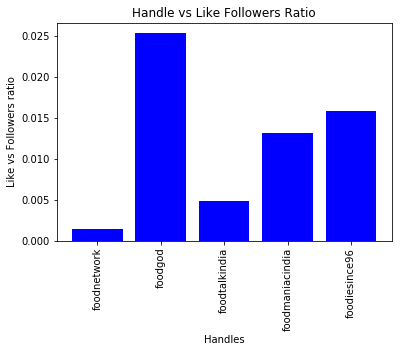

In [25]:
import matplotlib.pyplot as plt
plt.bar(top_5_blog,average_followers_likes,color='blue')
plt.xticks(rotation=90)
plt.xlabel('Handles')
plt.ylabel('Like vs Followers ratio')
plt.title('Handle vs Like Followers Ratio')
plt.show()